## Sygnały harmoniczne i analiza Fouriera

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.signal

### Modulacja fazy i amplitudy sygnału harmonicznego

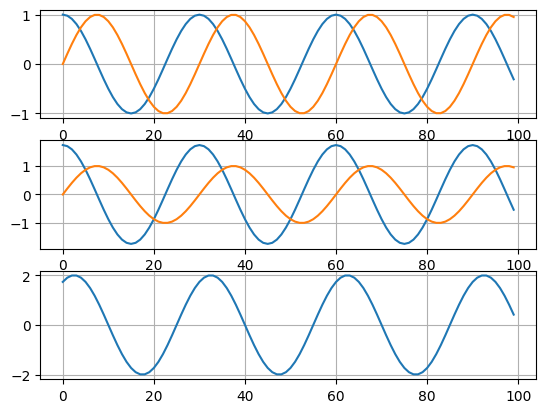

In [6]:
C = 2
phi = -30/180*np.pi

N = 100
T = 30

n = np.arange(N)

si = np.cos(2*np.pi/T * n)
sq = np.sin(2*np.pi/T * n)

A = C*np.cos(phi)
B = -C*np.sin(phi)

s = A*si + B*sq

plt.subplot(311)
plt.plot(n, si, n, sq)
plt.grid('on')

plt.subplot(312)
plt.plot(n, A*si, n, B*sq)
plt.grid('on')

plt.subplot(313)
plt.plot(n, s)
plt.grid('on')

### Modulacja sygnału zespolonego

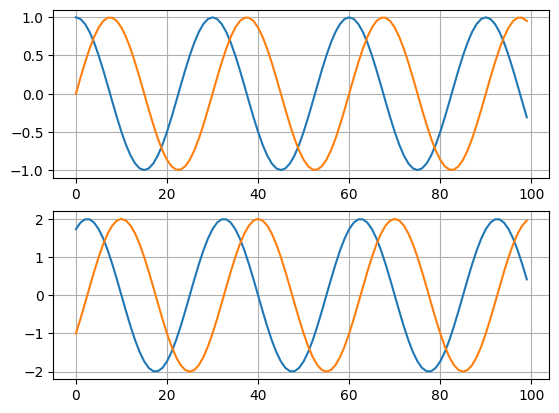

In [8]:
C = 2
phi = -30/180*np.pi

N = 100
T = 30

n = np.arange(N)

s = np.exp(1j * 2*np.pi/T * n)
sm = s * C * np.exp(1j * phi)

si = np.real(s)
sq = np.imag(s)

plt.subplot(211)
plt.plot(n, si, n, sq)
plt.grid('on')

plt.subplot(212)
plt.plot(n, np.real(sm), n, np.imag(sm))
plt.grid('on')

### Szereg Fouriera

(-1.0, 1.0)

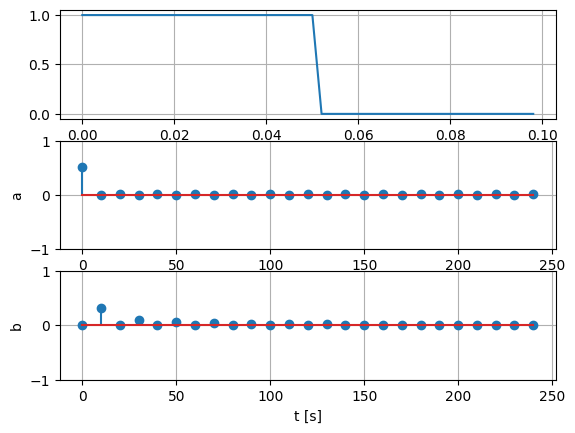

In [28]:
dt = 0.002
T = 0.1
N = math.floor(T/dt)

n = np.arange(N)
t = n * dt

s = np.sin(2*np.pi/T * t)>=0

S = np.fft.fft(s)/N
a = np.real(S)
b = -np.imag(S)

f = n/T

plt.subplot(311)
plt.plot(t, s)
plt.grid('on')
plt.xlabel('t [s]')

plt.subplot(312)
plt.stem(f[0:N//2], a[0:N//2])
plt.grid('on')
plt.xlabel('t [s]')
plt.ylabel('a')
plt.ylim([-1, 1])

plt.subplot(313)
plt.stem(f[0:N//2], b[0:N//2])
plt.grid('on')
plt.xlabel('t [s]')
plt.ylabel('b')
plt.ylim([-1, 1])

### Rekonstrukcja sygnału

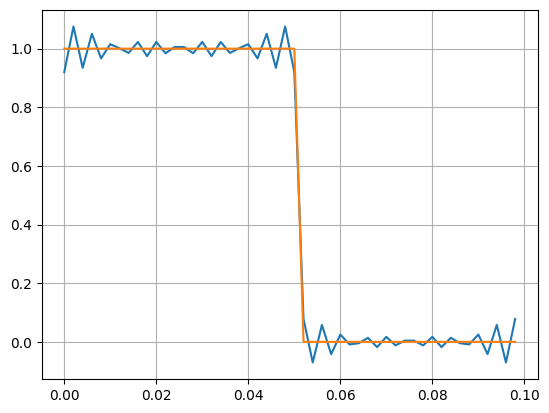

In [37]:
s_ = np.zeros(s.shape)

s_ = s_ + a[0]

for i in range(21):
  j = i+1
  s_ = s_ + 2*a[j]*np.cos(j*2*np.pi/T*t)
  s_ = s_ + 2*b[j]*np.sin(j*2*np.pi/T*t)

plt.plot(t, s_, t, s)
plt.grid('on')

### Ujemne częstotliwości

(-1.0, 1.0)

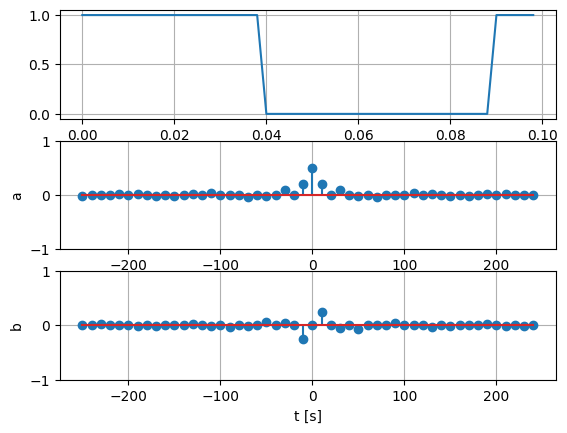

In [41]:
dt = 0.002
T = 0.1
N = math.floor(T/dt)

n = np.arange(N)
t = n * dt

s = np.sin(2*np.pi/T * t + 0.7)>=0

S = np.fft.fft(s)/N
S = np.fft.fftshift(S)
a = np.real(S)
b = -np.imag(S)

f = (n-N//2)/T

plt.subplot(311)
plt.plot(t, s)
plt.grid('on')
plt.xlabel('t [s]')

plt.subplot(312)
plt.stem(f, a)
plt.grid('on')
plt.xlabel('t [s]')
plt.ylabel('a')
plt.ylim([-1, 1])

plt.subplot(313)
plt.stem(f, b)
plt.grid('on')
plt.xlabel('t [s]')
plt.ylabel('b')
plt.ylim([-1, 1])

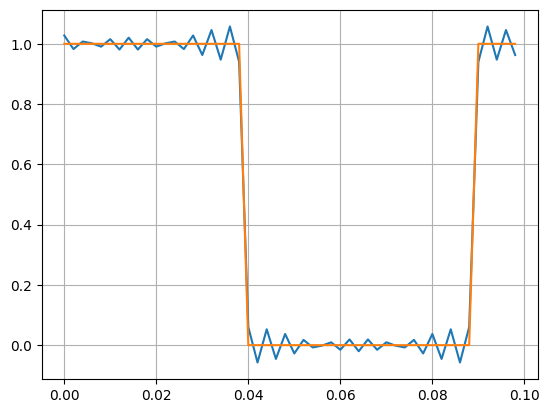

In [44]:
s_ = np.zeros(s.shape)

Nh = 21
for i in range(2*Nh + 1):
  j = N//2 - Nh + i
  f_ = f[j]
  s_ = s_ + a[j]*np.cos(2*np.pi*f_*t)
  s_ = s_ + b[j]*np.sin(2*np.pi*f_*t)

plt.plot(t, s_, t, s)
plt.grid('on')

### Zespolony szereg Fouriera

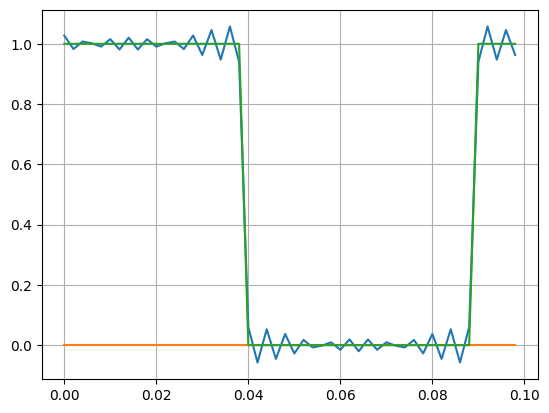

In [48]:
s_ = np.zeros(s.shape)

Nh = 21
for i in range(2*Nh + 1):
  j = N//2 - Nh + i
  f_ = f[j]
  s_ = s_ + S[j]*np.exp(2j*np.pi*f_*t)

plt.plot(t, np.real(s_), t, np.imag(s_), t, s)
plt.grid('on')